In [ ]:
from datetime import date

### 1 - Dates and Calendars

In [ ]:
today = date(2021, 10, 24)
print(today)

2021-10-24


In [ ]:
print("Sekarang tanggal : {}\nBulan : {}\nTahun : {}".format(today.day,today.month,today.year))

Sekarang tanggal : 24
Bulan : 10
Tahun : 2021


In [ ]:
print("Today : ",date.today())

Today :  2021-10-20


In [ ]:
url = "https://github.com/KelvinMulyawan/Gudang/blob/master/florida_hurricane_dates.pkl?raw=true"

import pandas as pd

hurricane = pd.read_pickle(url)

In [ ]:
hurricane[:5]

[datetime.date(1988, 8, 4),
 datetime.date(1990, 10, 12),
 datetime.date(2003, 4, 20),
 datetime.date(1971, 9, 1),
 datetime.date(1988, 8, 23)]

In [ ]:
early = 0
late = 0
for hrcne in hurricane:
    if hrcne.month < 6:
        early += 1
    else:
        late += 1
        
print(early)
print(late)

10
225


#### Math and Dates

In [ ]:
start = date(2021,10,10)
end = date(2021,10,21)

days = (end - start).days

print("Selisih Hari : {}".format(days))

Selisih Hari : 11


In [ ]:
from collections import defaultdict

disaster = defaultdict(int)

for date in hurricane:
    disaster[date.month] += 1
    
print(disaster)

defaultdict(<class 'int'>, {8: 49, 10: 43, 4: 1, 9: 70, 5: 8, 6: 32, 7: 21, 11: 9, 12: 1, 2: 1})


In [ ]:
first_date = min(hurricane)
print(first_date)

1950-08-31


In [ ]:
print(first_date.isoformat())

1950-08-31


In [ ]:
print(first_date.strftime("%m/%d/%Y"))

08/31/1950


In [ ]:
print(first_date.strftime("%d-%m-%Y"))

31-08-1950


In [ ]:
print(first_date.strftime("%m-%Y"))

08-1950


In [ ]:
print(first_date.strftime("%B-%Y"))

August-1950


In [ ]:
print(first_date.strftime("%A %B"))

Thursday August


### 2 - Combining Dates and Times

<p><b>ISO 8601 format</b></p>

In [ ]:
from datetime import datetime

dt = datetime(2017, 10, 1, 15, 26, 26)

print(dt.isoformat())

2017-10-01T15:26:26


In [ ]:
dt = dt.replace(year=2021)

print(dt.isoformat())

2021-10-01T15:26:26


In [ ]:
url = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/capital-onebike.csv"

capital = pd.read_csv(url)

In [ ]:
capital.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [ ]:
print(capital['Start date'].dtype)
print(capital['End date'].dtype)

object
object


In [ ]:
capital['Start date'] = pd.to_datetime(capital['Start date'])
capital['End date'] = pd.to_datetime(capital['End date'])

In [ ]:
print(capital['Start date'].dtype)
print(capital['End date'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
for cap in capital['Start date'].head(2):
    print(cap.month)

10
10


In [ ]:
trip = {'AM':0,'PM':0}

for time in capital['Start date']:
    if time.hour < 12:
        trip['AM'] += 1
    else:
        trip['PM'] += 1
        
print(trip)

{'AM': 94, 'PM': 196}


In [ ]:
from datetime import datetime

s = '2017-02-03 00:00:01'

fmt = '%Y-%m-%d %H:%M:%S'

d = datetime.strptime(s, fmt)

print(d)

2017-02-03 00:00:01


In [ ]:
print(type(d))

<class 'datetime.datetime'>


In [ ]:
from datetime import datetime

s = '2030-10-15'

fmt = '%Y-%m-%d'

d = datetime.strptime(s, fmt)

print(d)

2030-10-15 00:00:00


In [ ]:
s = '12/15/1986 08:00:00'

fmt = '%m/%d/%Y %H:%M:%S'

d = datetime.strptime(s, fmt)

print(d)

1986-12-15 08:00:00


In [ ]:
s = "19/10/2021"

fmt = "%d/%B/%Y"

try:
    print(datetime.strptime(s,fmt))
except:
    print("Format harus sesuai s")

Format harus sesuai s


In [ ]:
capital.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [ ]:
capital['Start date'].iloc[0]

Timestamp('2017-10-01 15:23:25')

In [ ]:
s = capital['Start date'].iloc[0]

fmt = '%Y-%m-%dT%H:%M:%S'

print(s.isoformat())

2017-10-01T15:23:25


In [ ]:
print(s.strftime(fmt))

2017-10-01T15:23:25


#### Timestamp

In [ ]:
from datetime import datetime

timestamps = [1514665153, 1514664543]

dts = []

for ts in timestamps:
    dts.append(datetime.fromtimestamp(ts))

print(dts)

[datetime.datetime(2017, 12, 31, 3, 19, 13), datetime.datetime(2017, 12, 31, 3, 9, 3)]


In [ ]:
for start, end in zip(capital['Start date'].head(5), capital['End date'].head(5)):
    print(end - start)

0 days 00:03:01
0 days 02:07:02
0 days 00:05:43
0 days 00:21:18
0 days 00:21:17


In [ ]:
duration = []

for start, end in zip(capital['Start date'], capital['End date']):
    duration.append((end - start).total_seconds())

In [ ]:
average_duration = sum(duration) / len(duration)
print(average_duration) # dalam detik
print(average_duration / 60) # dalam menit
print(average_duration / 3600) # dalam jam

1178.9310344827586
19.648850574712643
0.3274808429118774


0.25 = 15 menit<br>
0.5 = 30 menit<br>
0.75 = 45 menit<br>
1 = 60 menit<br>

In [ ]:
longest, shortest = max(duration), min(duration)

longest_data, shortest_data = duration.index(longest), duration.index(shortest)

print(longest)
print(shortest)

76913.0
-3346.0


In [ ]:
capital.iloc[[longest_data]]

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
86,2017-10-21 13:47:43,2017-10-22 11:09:36,31616,3rd & H St NE,31607,14th & D St SE,W20529,Member


In [ ]:
capital.iloc[[shortest_data]]

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
129,2017-11-05 01:56:50,2017-11-05 01:01:04,31615,6th & H St NE,31627,3rd & M St NE,W20529,Member


### 3 - Time Zones

In [ ]:
from datetime import datetime, timezone

dt = datetime(2021, 10, 21, 15, 26, 26, tzinfo=timezone.utc)

print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [ ]:
# Create a timezone for Pacific Standard Time, or UTC-8

from datetime import timedelta

pst = timezone(timedelta(hours=-8))

dt = datetime(2021, 10, 21, 15, 26, 26, tzinfo=pst)

print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [ ]:
# Create a timezone for Australian Eastern Daylight Time, or UTC+11

aedt = timezone(timedelta(hours=11))

dt = datetime(2021, 10, 21, 15, 26, 26, tzinfo=aedt)

print(dt.isoformat())

2017-10-01T15:26:26+11:00


In [ ]:
from datetime import date, datetime, timezone, timedelta

today = date.today()
print(today)

2021-10-21


In [ ]:
today_date_time = datetime.now()
print(today_date_time)

2021-10-21 10:57:13.045171


In [ ]:
# Create a timezone for Waktu Indonesia Barat, WIB or UTC+7

wib = timezone(timedelta(hours=7))

barat = today_date_time.replace(tzinfo=wib)
print(barat)

2021-10-21 10:57:13.045171+07:00


In [ ]:
# Create a timezone for Waktu Indonesia Tengah, WITA or UTC+8

wita = timezone(timedelta(hours=8))
tengah = today_date_time.replace(tzinfo = wita)
print(tengah)

2021-10-21 10:57:13.045171+08:00


In [ ]:
# Create a timezone for Waktu Indonesia Timur, WIT or UTC+9

wit = timezone(timedelta(hours=9))
timur = today_date_time.replace(tzinfo = wit)
print(timur)

2021-10-21 10:57:13.045171+09:00


In [ ]:
import pandas as pd
from datetime import datetime, date, timezone, timedelta

url = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/capital-onebike.csv"

capital = pd.read_csv(url)

capital.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [ ]:
for column in ['Start date','End date']:
  capital[column] = pd.to_datetime(capital[column])

print(capital['Start date'].dtype)
print(capital['End date'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
print(capital['Start date'].iloc[0])

2017-10-01 15:23:25


In [ ]:
edt = timezone(timedelta(hours=-4))

tgl = capital['Start date'].iloc[0]

tgl_rep = tgl.replace(tzinfo = edt)

print(tgl)
print(tgl_rep)

2017-10-01 15:23:25
2017-10-01 15:23:25-04:00


In [ ]:
from dateutil import tz
from datetime import datetime

wib = tz.gettz('Asia/Jakarta')
wita = tz.gettz('Asia/Makassar')
wit = tz.gettz('Asia/Jayapura')

today = datetime.now()

print("Barat : ",today.replace(tzinfo=wib))
print("Tengah : ",today.replace(tzinfo=wita))
print("Timur : ",today.replace(tzinfo=wit))

Barat :  2021-10-21 16:56:38.244796+07:00
Tengah :  2021-10-21 16:56:38.244796+08:00
Timur :  2021-10-21 16:56:38.244796+09:00


### 4 - Easy and Powerful: Dates and Times in Pandas

In [1]:
from datetime import datetime, timezone, timedelta
from dateutil import tz
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/capital-onebike.csv"

capital = pd.read_csv(url, parse_dates=['Start date','End date'])

capital.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [6]:
# Subtract the start date from the end date
ride_durations = capital['End date'] - capital['Start date']

# Convert the results to seconds
capital['Duration'] = ride_durations.dt.total_seconds()

print(capital['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


In [7]:
# Create joyrides
joyrides = (capital['Start station'] == capital['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(capital['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(capital[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). People also travel more in December, and they work fewer days so they commute less.

How might the weather or the season have affected the length of bike trips?

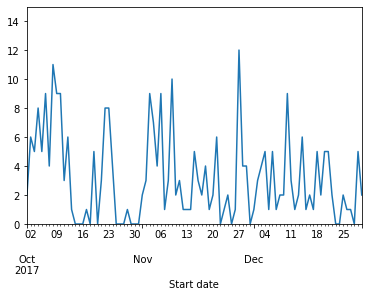

In [9]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
capital.resample('D', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 15])

# Show the results
plt.show()

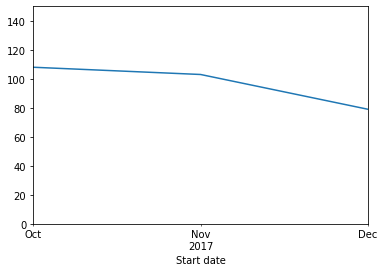

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
capital.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

In [12]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = capital.resample('M', on = 'Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


In [14]:
# Group rides by member type, and resample to the month
grouped = capital.groupby('Member type')\
  .resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


In [15]:
# Localize the Start date column to America/New_York
capital['Start date'] = capital['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(capital['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [18]:
# Convert the Start date column to Europe/London
capital['Start date'] = capital['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(capital['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


In [22]:
# Add a column for the weekday of the start of the ride
capital['Ride start weekday'] = capital['Start date'].dt.day_name()

# Print the median trip time per weekday
print(capital.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


In [26]:
url = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/capital-onebike.csv"

capital = pd.read_csv(url, parse_dates=['Start date','End date'])

# Shift the index of the end date up one; now subract it from the start date
capital['Time since'] = capital['Start date'] - (capital['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
capital['Time since'] = capital['Time since'].dt.total_seconds()

# Resample to the month
monthly = capital.resample('M', on = 'Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31    5.519242
2017-11-30    7.256443
2017-12-31    9.202380
Freq: M, Name: Time since, dtype: float64


### Referensi

<ol>
    <li><a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes">Format Time</a></li>
    <li><a href="https://id.wikipedia.org/wiki/ISO_8601">ISO Format 8601</a></li>
    <li><a href="https://id.wikipedia.org/wiki/UTC%2B07:00">WIB UTC</a></li>
    <li><a href="https://id.wikipedia.org/wiki/UTC%2B08:00">WITA UTC</a></li>
    <li><a href="https://id.wikipedia.org/wiki/UTC%2B09:00">WIT UTC</a></li>
</ol>